#Download Data

In [2]:
import urllib.request
import zipfile
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob
from matplotlib.offsetbox import OffsetImage,AnnotationBbox
import pandas as pd

In [3]:
#does GPU is in use ?
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Sun Apr 10 13:57:09 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [4]:
#check if using high-RAM
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 13.6 gigabytes of available RAM

Not using a high-RAM runtime


In [5]:
def dl_and_unzip(url,path):
    #open file
    file,_ = urllib.request.urlretrieve(url)
    print(f'Retrieved file from {url}')
    #read it
    zipped = zipfile.ZipFile(file, 'r')
    print('File opened')
    #extract it
    zipped.extractall(path)
    print("Files extracted")

In [6]:
#GTSDB download

url = "https://sid.erda.dk/public/archives/ff17dc924eba88d5d01a807357d6614c/FullIJCNN2013.zip"
path = "/content/"
dl_and_unzip(url,path)

Retrieved file from https://sid.erda.dk/public/archives/ff17dc924eba88d5d01a807357d6614c/FullIJCNN2013.zip
File opened
Files extracted


In [7]:
#GTSRB download

path = "/content/GTSRB/"

# test data
url = "https://sid.erda.dk/public/archives/daaeac0d7ce1152aea9b61d9f1e19370/GTSRB_Final_Test_Images.zip"
dl_and_unzip(url,path)

# train data
url = "https://sid.erda.dk/public/archives/daaeac0d7ce1152aea9b61d9f1e19370/GTSRB_Final_Training_Images.zip"
dl_and_unzip(url,path)

# test labels
url = "https://sid.erda.dk/public/archives/daaeac0d7ce1152aea9b61d9f1e19370/GTSRB_Final_Test_GT.zip"
dl_and_unzip(url,path)

# This has the sign images
url = 'http://benchmark.ini.rub.de/Dataset/tsr-analysis-src.zip'
dl_and_unzip(url,path)

Retrieved file from https://sid.erda.dk/public/archives/daaeac0d7ce1152aea9b61d9f1e19370/GTSRB_Final_Test_Images.zip
File opened
Files extracted
Retrieved file from https://sid.erda.dk/public/archives/daaeac0d7ce1152aea9b61d9f1e19370/GTSRB_Final_Training_Images.zip
File opened
Files extracted
Retrieved file from https://sid.erda.dk/public/archives/daaeac0d7ce1152aea9b61d9f1e19370/GTSRB_Final_Test_GT.zip
File opened
Files extracted
Retrieved file from http://benchmark.ini.rub.de/Dataset/tsr-analysis-src.zip
File opened
Files extracted


#EDA of Images

In [8]:
#Function for adding images to plot axis
#https://stackoverflow.com/questions/44246650/add-image-annotations-to-bar-plots/44264051#44264051
def get_sign(num):
    #load sign
    image = cv2.imread(f'/content/GTSRB/resources/signs/{i}.jpg')
    #color correction
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    #size it
    return cv2.resize(image,(20,20))

def offset_image(coord, num, ax):
    #get the sign
    img = get_sign(num)
    #offset for axes
    im = OffsetImage(img, zoom= 0.72)
    im.image.axes = ax
    #add the sign
    ab = AnnotationBbox(im, (coord, 0),  xybox=(0., -16.), frameon=False,
                        xycoords='data',  boxcoords="offset points", pad=0)

    ax.add_artist(ab)

In [9]:
sign_count = []
sign_track_count = []
#43 categoris
x = list(range(43))
for i in range(43):
    #load sign
    image_id = str(i).rjust(5,'0')
    files = glob.glob(f'/content/GTSRB/GTSRB/Final_Training/Images/{image_id}/*')
    #append length minus csv
    sign_count.append(len(files) - 1)
    #each track is 30 images
    sign_track_count.append(len(files)//30)
    

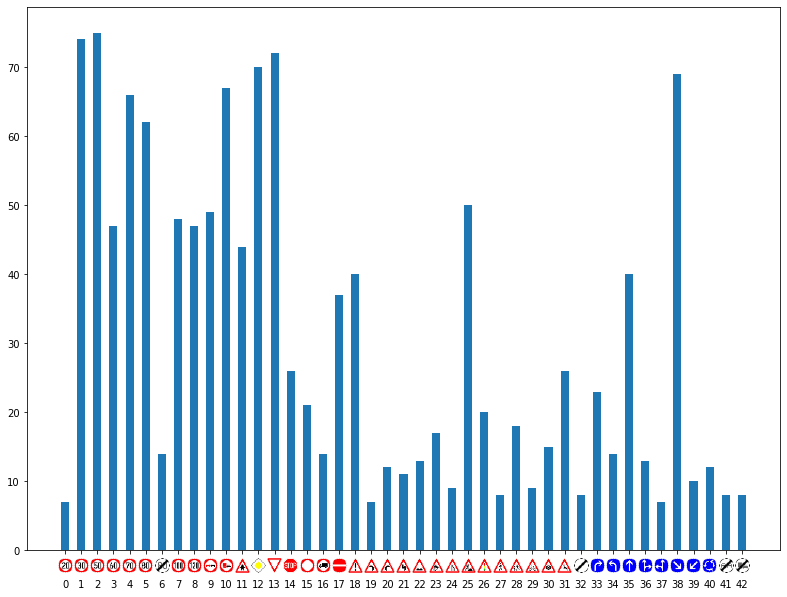

In [10]:
fig, ax = plt.subplots(figsize=(13.5,10))
#bar chart with track length
ax.bar(x, sign_track_count, width=0.5,align="center")
ax.set_xticks(range(43))
ax.set_xticklabels(x)
ax.tick_params(axis='x', which='major', pad=26)
#add sign images
for i, c in enumerate(x):
    offset_image(i, c, ax)

plt.show()

In [11]:
#load training images for statistics
#load images
train_images = []
train_files = glob.glob('/content/GTSRB/GTSRB/Final_Training/Images/*/*')  # iterate through all subfolders
train_labels = []
track_labels = []
#loop over files
for file in train_files:
    #is image
    if '.ppm' in file:
        #read
        image = cv2.imread(file)
#         image = cv2.resize(image, (image_size, image_size))
        # read in the files and downscale to 25x25
        #extrac label as it is the 
        train_labels.append(int(file.split("/")[-2]))
        track_labels.append(int(file.split("/")[-1].split('_')[0]))
        train_images.append(image)
print(len(train_images))

39209


In [12]:
### what are the action or Insights that we can get from the graph below (max pixel distribution)

In [13]:
#Extract largest dimension for each image
size_list = []
for i in train_images:
    size_list.append(max(i.shape[0],i.shape[1]))

Text(0, 0.5, 'Counts/bin')

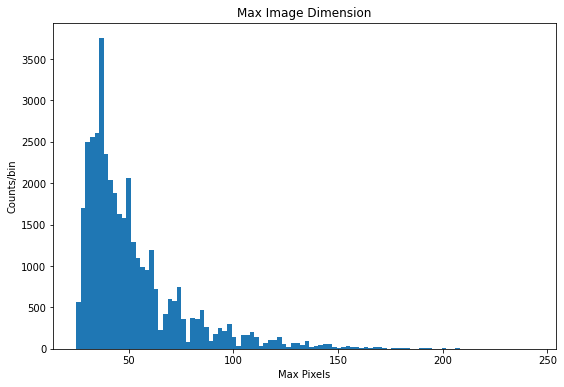

In [14]:
plt.figure(figsize=(9,6))
plt.hist(size_list,bins = 100);
plt.title('Max Image Dimension')
plt.xlabel('Max Pixels')
plt.ylabel('Counts/bin')

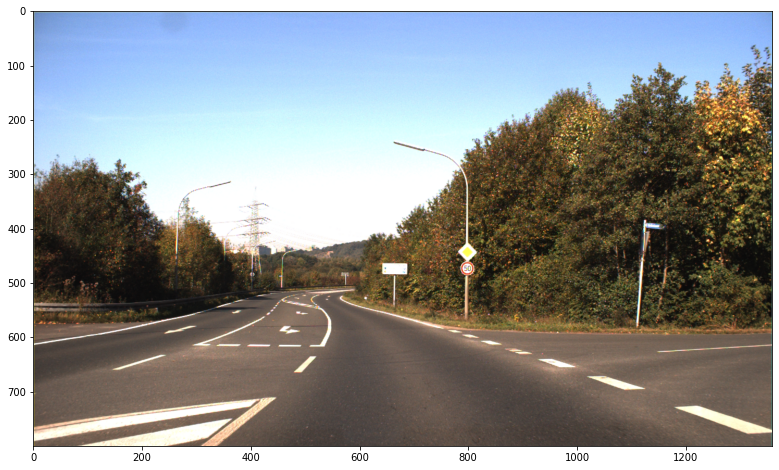

In [15]:
#Just show the first image
plt.figure(figsize=(13.6,8))
image = cv2.imread('/content/FullIJCNN2013/00008.ppm')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

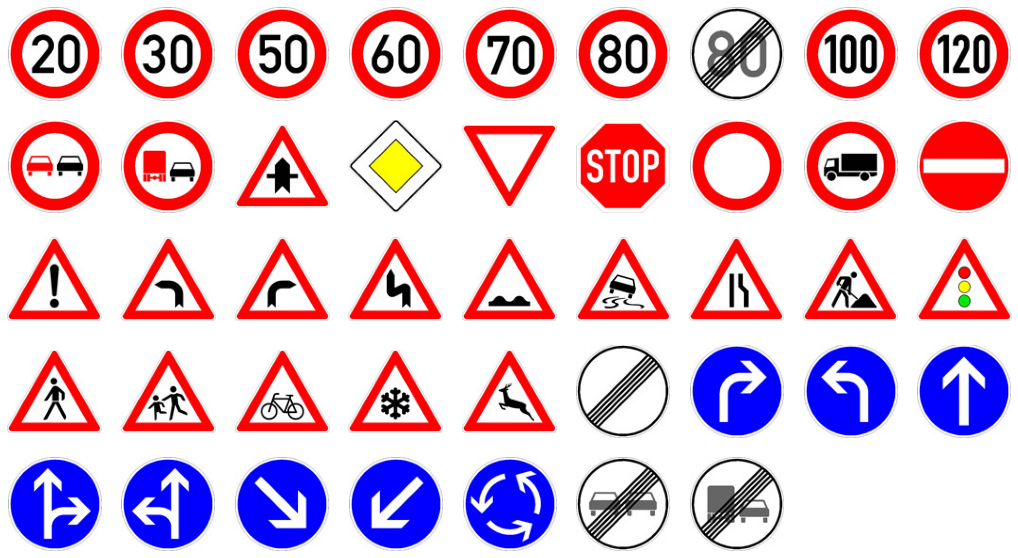

In [16]:
plt.figure(figsize=(18,10))
#43 images, doesn't divide well
for i in range(5):
    for j in range(9):
        #table will be 5x9 set things up for that
        index = i*9+j
        if index > 42:
            continue
        plt.subplot(5, 9, index + 1)
        # load and plot the sign 
        image = cv2.imread(f'/content/GTSRB/resources/signs/{index}.jpg')
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.imshow(image)
        plt.axis('off')
plt.show()

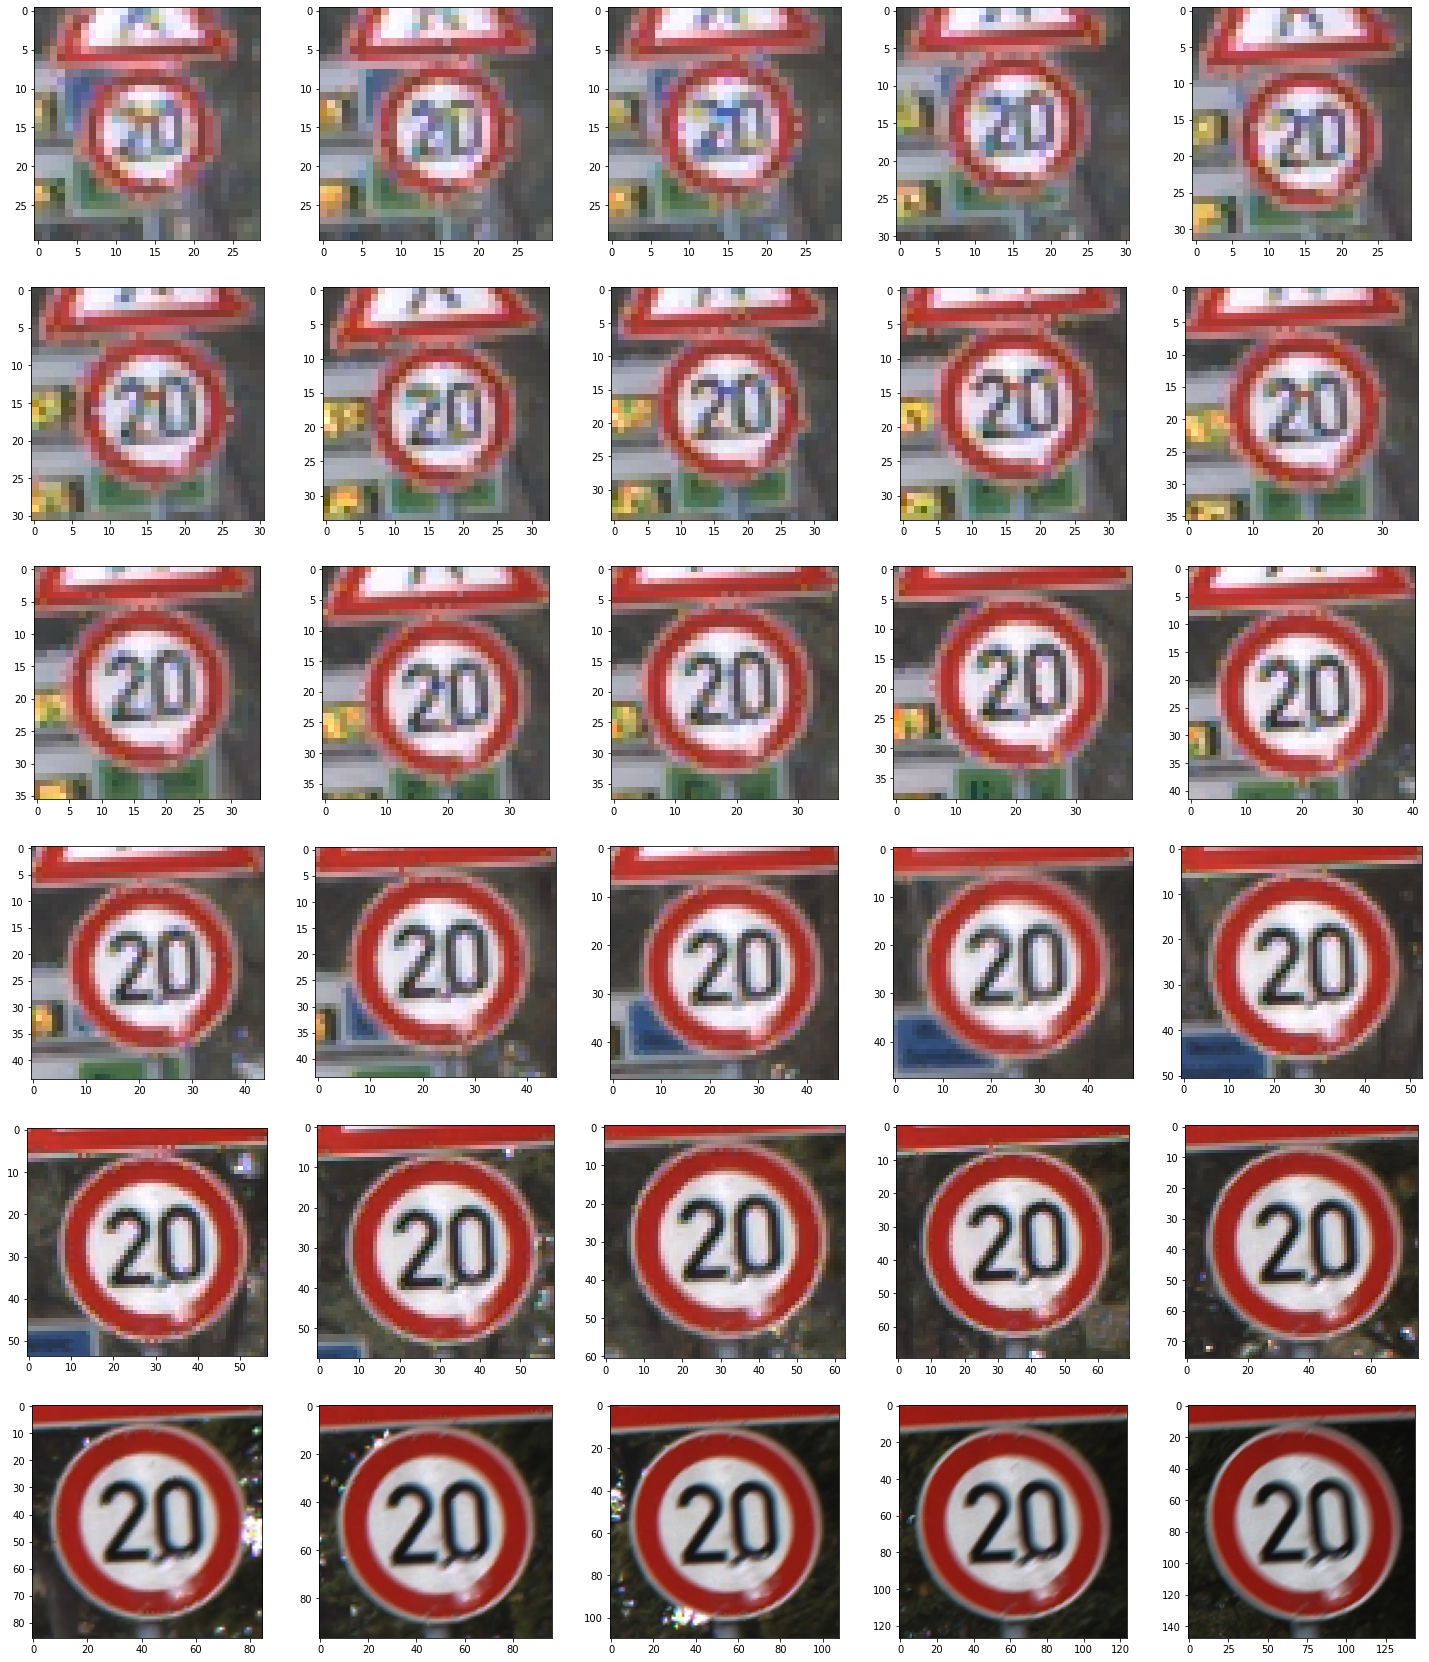

In [17]:
plt.figure(figsize=(25,30))
#30 divides nicer, 6x5
for i in range(6):
    for j in range(5):
        plt.subplot(6, 5, i*5 + j + 1)
        image_id = str(i*5+j).rjust(5,'0')
        #load and plot each image of track
        image = cv2.imread(f'/content/GTSRB/GTSRB/Final_Training/Images/00000/00000_{image_id}.ppm')
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.imshow(image)
plt.show()

In [ ]:
# plt.figure(figsize=(13.6,8))
# image = cv2.imread('/content/GTSRB/GTSRB/Final_Training/Images/00000/00000_00029.ppm')
# image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# plt.imshow(image)
# plt.show()
# #/content/FullIJCNN2013/00/00000.ppm


#Define Traffic Signs Categories

In [18]:
#Create df with the actual coordinates of the Traffic signs , file path & his class
label_df = pd.read_csv(f'/content/FullIJCNN2013/gt.txt',names=['file','x1','y1','x2','y2','class'],delimiter = ';')
#test df for images with more than one traffic sign
for i in range(label_df[label_df['file'] == '00898.ppm'].shape[0]):
    print('test')

test
test


In [ ]:
label_df.head()

In [21]:
#blue circle signs
zero = [33,34,35,36,37,38,39,40]
#b/w stripe circle
one = [6,32,41,42]
#danger
two = [17]
#diamond
three = [12]
#red circle
four = [0,1,2,3,4,5,7,8,9,10,15,16]
#red down triangle
five = [13]
#red up triangle
six = [11,18,19,20,21,22,23,24,25,26,27,28,29,30,31]
#stop
seven = [14]

subclass_list = [zero, one, two, three, four, five, six, seven]

In [22]:
# implement image subclass from above
def find_subclass(classid):
    for i in range(8):
        if classid in subclass_list[i]:
            return i
label_df['sub_class']=label_df['class'].map(find_subclass)

In [23]:
label_df.sub_class.value_counts()

4    557
6    219
0    163
3     85
5     83
1     45
7     32
2     29
Name: sub_class, dtype: int64

##Create XML files for images file

In [24]:
#change active dir
%cd /content/FullIJCNN2013
#%cd /FullIJCNN2013
# Verify we're in the correct working directory
%pwd

/content/FullIJCNN2013


'/content/FullIJCNN2013'

In [25]:
# create folder in "FullIJCNN2013" named "xml"
!mkdir xml

In [26]:
#create xml file containg the name of the subclass , the resolution & the actual coordinates of the traffic signs
for j in range(900):
    image_id = str(j).rjust(5,'0')
    
    f_out = open(f'/content/FullIJCNN2013/xml/{image_id}.xml','w')
    f_out.write(f"""<annotation>
    <folder>{f'/content/FullIJCNN2013/'}</folder>
    <path>{f'/content/FullIJCNN2013/{image_id}.ppm'}</path>
    <source>
        <database>Unknown</database>
    </source>
    <filename>{str(j).rjust(5,'0')}.ppm</filename>
    <size>
        <width>1360</width>
        <height>800</height>
        <depth>3</depth>
    </size>
    <segmented>0</segmented>
""")
    temp_df = label_df[label_df['file'] == image_id+'.ppm']
    for i in range(temp_df.shape[0]):
        f_out.write(f"""    <object>
        <name>{temp_df.iloc[i,6]+1}</name>
        <pose>Unspecified</pose>
        <truncated>0</truncated>
        <difficult>0</difficult>
        <bndbox>
            <xmin>{temp_df.iloc[i,1]}</xmin>
            <ymin>{temp_df.iloc[i,2]}</ymin>
            <xmax>{temp_df.iloc[i,3]}</xmax>
            <ymax>{temp_df.iloc[i,4]}</ymax>
        </bndbox>
    </object>
""")        
    f_out.write("</annotation>")
    f_out.close()

#Load packages & Install Mask RCNN Model

##Down Grade TensorFlow & Keras Packages

In [27]:
#!pip install tensorflow==2.2
# !pip install keras==2.4.3
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [28]:
!pip uninstall keras-nightly
!pip uninstall keras
!pip install h5py==2.10.0
!pip install q keras==2.1.0

Found existing installation: Keras 2.3.1
Uninstalling Keras-2.3.1:
  Would remove:
    /tensorflow-1.15.2/python3.7/Keras-2.3.1.dist-info/*
    /tensorflow-1.15.2/python3.7/docs/*
    /tensorflow-1.15.2/python3.7/keras/*
Proceed (y/n)? ט
Your response ('ט') was not one of the expected responses: y, n
Proceed (y/n)? y
  Successfully uninstalled Keras-2.3.1
     |████████████████████████████████| 2.9 MB 8.0 MB/s 
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
     |████████████████████████████████| 302 kB 8.8 MB/s 
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0


In [29]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
#import cv2
from sklearn.model_selection import train_test_split
import random

import tensorflow as tf
import keras
import glob
from sklearn import metrics
from tensorflow.keras import utils

from xml.etree import ElementTree
from numpy import zeros
from numpy import asarray

from tensorflow.keras.models import load_model
from matplotlib import pyplot
from numpy import expand_dims
from matplotlib.patches import Rectangle

import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


**** Check Packages version ****

In [30]:
print(tf.__version__)
print(keras.__version__)

1.15.2
2.1.0


In [31]:
%cd /content/

/content


##Clone Mask_RCNN model from git

In [32]:
### new model git
#!git clone https://github.com/leekunhee/Mask_RCNN

#### old model git
#!pip install git+https://github.com/matterport/Mask_RCNN
!git clone https://github.com/matterport/Mask_RCNN.git

Cloning into 'Mask_RCNN'...
remote: Enumerating objects: 956, done.
remote: Total 956 (delta 0), reused 0 (delta 0), pack-reused 956
Receiving objects: 100% (956/956), 125.23 MiB | 32.23 MiB/s, done.
Resolving deltas: 100% (565/565), done.


In [33]:
#change active dirctory
%cd /content/Mask_RCNN

/content/Mask_RCNN


**Install Mask_RCNN 'requirements' packages **

In [34]:
!pip3 install -r requirements.txt

     |████████████████████████████████| 154 kB 5.8 MB/s 
     |████████████████████████████████| 297 kB 49.2 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=9d8bfec73972d874437c5be818a776806265d0df8160beb41e4f0722b770f8dc
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
kapre 0.3.7 requires tensorflow>=2.0.0, but you have tensorflow 1.15.2 which is incompatible.


In [35]:
%pwd

'/content/Mask_RCNN'

In [36]:
%cd /content/Mask_RCNN

/content/Mask_RCNN


In [37]:
!python /content/Mask_RCNN/setup.py install
#import keras.engine.topology as KE
#import tensorflow.python.keras.engine  as KE

/usr/local/lib/python3.7/dist-packages/setuptools/dist.py:700: UserWarning: Usage of dash-separated 'description-file' will not be supported in future versions. Please use the underscore name 'description_file' instead
  % (opt, underscore_opt))
/usr/local/lib/python3.7/dist-packages/setuptools/dist.py:700: UserWarning: Usage of dash-separated 'license-file' will not be supported in future versions. Please use the underscore name 'license_file' instead
  % (opt, underscore_opt))
/usr/local/lib/python3.7/dist-packages/setuptools/dist.py:700: UserWarning: Usage of dash-separated 'requirements-file' will not be supported in future versions. Please use the underscore name 'requirements_file' instead
  % (opt, underscore_opt))
running install
running bdist_egg
running egg_info
creating mask_rcnn.egg-info
writing mask_rcnn.egg-info/PKG-INFO
writing dependency_links to mask_rcnn.egg-info/dependency_links.txt
writing top-level names to mask_rcnn.egg-info/top_level.txt
writing manifest file 'ma

** Install Mask_RCNN model**

#Import MRCNN packages & classes

In [38]:
from mrcnn.config import Config
from mrcnn.model import MaskRCNN
from mrcnn.utils import Dataset
from mrcnn.utils import compute_ap
from mrcnn.model import load_image_gt
from mrcnn.model import mold_image
from mrcnn import visualize
from mrcnn.visualize import display_images
import mrcnn.model as modellib
from mrcnn.model import log



In [39]:
class RoadDataset(Dataset):
    #Load the model
    #is_train loads the set type, dataset_dir is where images are
    #train_list and test_list to differntiate which file is what set
    def load_dataset(self, dataset_dir,is_train=True):
        #Two categories, normal and not
        for i in range(8):
            self.add_class('dataset',i+1,str(i+1))
        files = glob.glob(dataset_dir + '*.ppm') ###normalized_full/
        for file_ in files:
            image_idstr = file_[-9:-4] #[-14:-9]
            image_id = int(image_idstr)
            if is_train and image_id >= 600:
                continue
            elif not is_train and image_id < 600:
                continue
            img_path = file_
            #print(img_path)
            ann_path = f'{dataset_dir}xml/{image_idstr}.xml'
            # add to dataset
            self.add_image('dataset', image_id=image_id, path=img_path, 
                       annotation=ann_path,class_ids=[0,1,2])
        
    def extract_boxes(self, filename):
        # load and parse the file
        tree = ElementTree.parse(filename)
        # get the root of the document
        root = tree.getroot()
        # extract each bounding box
        boxes = list()
        for box in root.findall('.//object'):
            name = box.find('name').text
            xmin = int(box.find('./bndbox/xmin').text)
            ymin = int(box.find('./bndbox/ymin').text)
            xmax = int(box.find('./bndbox/xmax').text)
            ymax = int(box.find('./bndbox/ymax').text)
            coors = [xmin, ymin, xmax, ymax, name]
            boxes.append(coors)
        # extract image dimensions
        width = int(root.find('.//size/width').text)
        height = int(root.find('.//size/height').text)
        # print(boxes)
        return boxes, width, height

    def load_mask(self, image_id):
        # get details of image
        info = self.image_info[image_id]
        # define box file location
        path = info['annotation']
        # load XML
        boxes, w, h = self.extract_boxes(path)
        # create one array for all masks, each on a different channel
        masks = zeros([h, w, len(boxes)], dtype='uint8')
        # create masks
        class_ids = list()
        for i in range(len(boxes)):
            box = boxes[i]
            row_s, row_e = box[1], box[3]
            col_s, col_e = box[0], box[2]
            masks[row_s:row_e, col_s:col_e, i] = int(box[4])
            class_ids.append(self.class_names.index(str(box[4])))
        return masks, asarray(class_ids, dtype='int32')

    def image_reference(self, image_id):
        info = self.image_info[image_id]
        return info['path']

In [40]:
# define a configuration for the model
class RoadConfig(Config):
    # define the name of the configuration
    NAME = "road_cfg"
    # number of classes (background + num signs) (8 for sub cats, 43 for all signs)
    NUM_CLASSES = 1 + 8
    DETECTION_MIN_CONFIDENCE = 0.5
    # number of training steps per epoch
    STEPS_PER_EPOCH = 131

In [41]:
class PredictionConfig(Config):
    # define the name of the configuration
    NAME = "road_cfg"
    # number of classes (background + num signs)
    NUM_CLASSES = 1 + 8
    # simplify GPU config
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    DETECTION_MIN_CONFIDENCE = 0.2

#Run Model

##Load Train\\Test Data

In [42]:
#make train dataset
train_set = RoadDataset()
train_set.load_dataset('/content/FullIJCNN2013/',is_train=True)
train_set.prepare()
print('Train: %d' % len(train_set.image_ids))

Train: 600


In [43]:
#make test dataset
test_set = RoadDataset()
test_set.load_dataset('/content/FullIJCNN2013/',is_train=False)
test_set.prepare()
print('Test: %d' % len(test_set.image_ids))

Test: 300


##Define config variable

In [44]:
config = RoadConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     2
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.5
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 2
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                21
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

Define Drive path for weights & models checkpoints

In [45]:
from google.colab import drive
drive.mount('/content/drive')

path_weights = '/content/drive/MyDrive/Colab Notebooks/Projects/Deep Learning/Detection/MaskRCNN_models/road_cfg20220401T1834/mask_rcnn_road_cfg_0070.h5'
#'/content/drive/MyDrive/Colab Notebooks/Projects/Deep Learning/Detection/mask_rcnn_coco.h5'
path_save_models = '/content/drive/MyDrive/Colab Notebooks/Projects/Deep Learning/Detection/MaskRCNN_models/'

Mounted at /content/drive


##Define model object

In [ ]:
# define the model
model = MaskRCNN(mode='training', model_dir= path_save_models, config= config)
# load weights (mscoco) and exclude the output layers






Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
box_ind is deprecated, use box_indices instead


##Load Model Weights

In [ ]:
model.load_weights(path_weights
                   ,by_name=True
                   ,exclude=["mrcnn_class_logits", "mrcnn_bbox_fc","mrcnn_bbox", "mrcnn_mask"]
                  )







Re-starting from epoch 70


##Train Model

In [ ]:
# # Using TensorBoard for Logging

# # Load the TensorBoard notebook extension
# %load_ext tensorboard
# # Open a dashboard, watch 'logs' folder
# %tensorboard --logdir logs

In [ ]:
# #from tensorflow.keras.callbacks import Callback, ModelCheckpoint
# import datetime
# # Tensorflow board
# logdir = '/content/drive/MyDrive/Colab Notebooks/Projects/Deep Learning/Detection/MaskRCNN_models/road_cfg20220401T1834/'
# # os.path.join(
# #     "logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
# tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)


In [ ]:
# model.train(train_set, test_set, learning_rate= config.LEARNING_RATE,
#             custom_callbacks = [tensorboard_callback] , epochs=80, layers='heads' ) ###epochs=45 #,custom_callbacks=[checkpoint] 

In [ ]:
model.summary()

#Make Predictions with Final Fit

In [ ]:
#initiate config
cfg = PredictionConfig()
#T2311 is image normalization, T2054 is without
model_inf = MaskRCNN(mode='inference'
    , model_dir= path_save_models + 'road_cfg20220401T1834/'
    , config=cfg)
# load model weights
model_path = path_save_models + 'road_cfg20220401T1834/mask_rcnn_road_cfg_0070.h5'
model_inf.load_weights(model_path, by_name=True)


Re-starting from epoch 70


In [ ]:
def get_ax(rows=1, cols=1, size=16):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Adjust the size attribute to control how big to render images
    """
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax

In [ ]:
#gt_mask#.sum()#16677

In [ ]:
image_id = 17# random.choice(test_set.image_ids)
image, image_meta, gt_class_id, gt_bbox, gt_mask =\
    modellib.load_image_gt(test_set, config, image_id)
info = test_set.image_info[image_id]
print("image ID: {}.{}  ({}) {}".format(info["source"], info["id"], 
                                            image_id, test_set.image_reference(image_id)))
results = model_inf.detect([image], verbose=1)


ax = get_ax(1)
r = results[0]
# if len(r['class_ids'] > 0):
#     print(r['class_ids'],label_df.iloc[image_id][7]+1)

visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            test_set.class_names, r['scores'], ax=ax,
                            title="Predictions")

log("gt_class_id", gt_class_id)
log("gt_bbox", gt_bbox)
log("gt_mask", gt_mask)

In [ ]:
#n_start and n_images help to allow for more control of output images and how many in each cycle
def plot_actual_vs_predicted(dataset, model, cfg,n_start, n_images=20):
    # load image and mask
    pyplot.figure(figsize=(16,8))
    for i in range(n_images):
        # load the image and mask
        image = dataset.load_image(i+n_start)
        mask, _ = dataset.load_mask(i+n_start)
        # convert pixel values (e.g. center)
        scaled_image = mold_image(image, cfg)
        # convert image into one sample
        sample = expand_dims(scaled_image, 0)
        # make prediction
        yhat = model.detect(sample, verbose=0)[0]
        # define subplot
        pyplot.subplot(n_images, 2, i*2+1)
        # plot raw pixel data
        pyplot.imshow(image)
        pyplot.title('Actual')
        # plot masks
        for j in range(mask.shape[2]):
            pyplot.imshow(mask[:, :, j], cmap='gray', alpha=0.3)
        # get the context for drawing boxes
        pyplot.subplot(n_images, 2, i*2+2)
        # plot raw pixel data
        pyplot.imshow(image)
        pyplot.title('Predicted')
        ax = pyplot.gca()
        # plot each box
        print(i+n_start,yhat['class_ids'])
        for box in yhat['rois']:
            # get coordinates
            y1, x1, y2, x2 = box
            # calculate width and height of the box
            width, height = x2 - x1, y2 - y1
            # create the shape
            rect = Rectangle((x1, y1), width, height, fill=False, color='red')
            # draw the box
            ax.add_patch(rect)
    # show the figure
    pyplot.show()

In [ ]:
#plot first 20 test images
for i in range(20):
    plot_actual_vs_predicted(test_set, model_inf, cfg,n_start=i,n_images = 1)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
image = test_set.load_image(1)
mask, _ = test_set.load_mask(1)
# convert pixel values (e.g. center)
scaled_image = mold_image(image, cfg)
# convert image into one sample
sample = expand_dims(scaled_image, 0)
# make prediction
yhat = model_inf.detect(sample, verbose=0)[0]

yhat['rois']

array([[ 411,  765,  439,  794],
       [ 426,  362,  449,  384],
       [ 210, 1119,  334, 1274]], dtype=int32)

In [ ]:
# how does the function comapre between actual box and predicted box ? - which predction to which of the actual boxes ?

In [ ]:
#  interArea = max(0, xB - xA + 1) * max(0, yB - yA + 1)
#add ing +1 because of the calculation of pixel screen croodinates. 
#when calculating pixel screen croodinates the two ends are inclusive (the distance between 5 and 3 is 3 --> 3,4,5). not like on x,y Coordinate system.

In [ ]:
#https://www.pyimagesearch.com/2016/11/07/intersection-over-union-iou-for-object-detection/
def bb_intersection_over_union(boxA, boxB):
    # determine the (x, y)-coordinates of the intersection rectangle
    xA = max(boxA[0], boxB[0])
    yA = max(boxA[1], boxB[1])
    xB = min(boxA[2], boxB[2])
    yB = min(boxA[3], boxB[3])
    # compute the area of intersection rectangle
    interArea = max(0, xB - xA + 1) * max(0, yB - yA + 1)
    # compute the area of both the prediction and ground-truth
    # rectangles
    boxAArea = (boxA[2] - boxA[0] + 1) * (boxA[3] - boxA[1] + 1)
    boxBArea = (boxB[2] - boxB[0] + 1) * (boxB[3] - boxB[1] + 1)
    # compute the intersection over union by taking the intersection
    # area and dividing it by the sum of prediction + ground-truth
    # areas - the interesection area
    iou = interArea / float(boxAArea + boxBArea - interArea)
    # return the intersection over union value
    return iou

In [ ]:
f_out = open(f'/content/drive/MyDrive/Colab Notebooks/Projects/Deep Learning/Detection/MaskRCNN_models/box_list_sub_norm_2.txt','w')

for i in range(900):
    image_id = str(i).rjust(5,'0')
    if i <600:
        image = train_set.load_image(i)
    else:
        image = test_set.load_image(i-600)
    # convert pixel values (e.g. center)
    scaled_image = mold_image(image, cfg)
    # convert image into one sample
    sample = expand_dims(scaled_image, 0)
    # make prediction
    yhat = model_inf.detect(sample, verbose=0)[0]
    roi_list = []
    
    for box in yhat['rois']:
        # get coordinates
        y1, x1, y2, x2 = box
        roi_list.append([x1,y1,x2,y2])
    
    #Check for redundancies
    for j in range(len(roi_list)):
        for k in range(j+1,len(roi_list)):
            if bb_intersection_over_union(roi_list[j],roi_list[k])>0.6:
                x1, y1, x2, y2 = roi_list[j]
                x3, y3, x4, y4 = roi_list[k]
                roi_list[j] = [(x1+x3)/2,(y1+y3)/2,(x2+x4)/2,(y2+y4)/2]
                roi_list[k] = [0,0,1,1]
    #For boxes not zeroed out, save to output
    for j in roi_list:
        if j[0] != 0:
            f_out.write(f'{image_id}.ppm;{int(j[0])};{int(j[1])};{int(j[2])};{int(j[3])}\n')
f_out.close()

In [ ]:
range(len([1]) )

range(0, 1)

In [ ]:
f_out.close()

#Model Evaluation - mAP

In [ ]:
#def evaluate_model for mAP
from mrcnn.model import load_image_gt
from mrcnn.model import mold_image
from mrcnn.utils import compute_ap, compute_recall
from numpy import expand_dims
from mrcnn import utils
def evaluate_model(dataset, model, cfg):
    APs = list();
    F1_scores = list();
    ARs = list();
    for image_id in dataset.image_ids:
    #image, image_meta, gt_class_id, gt_bbox, gt_mask = load_image_gt(dataset, cfg, image_id, use_mini_mask=False)
        image, image_meta, gt_class_id, gt_bbox, gt_mask = load_image_gt(dataset, cfg, image_id)
        scaled_image = mold_image(image, cfg)
        sample = expand_dims(scaled_image, 0)
        yhat = model.detect(sample, verbose=0)
        r = yhat[0]
        AP, precisions, recalls, overlaps = utils.compute_ap(gt_bbox, gt_class_id, gt_mask, r["rois"], r["class_ids"], r["scores"], r['masks'])
        #AR, positive_ids = compute_recall(r["rois"], gt_bbox, iou=0.1)
        #ARs.append(AR)
       # F1_scores.append((2* (np.mean(precisions) * np.mean(recalls)))/(np.mean(precisions) + np.mean(recalls)))#Method 1
        APs.append(AP)
    mAP = np.mean(APs)
    #mAR = np.mean(ARs)
    return mAP ,APs #, mAR #, F1_scores

In [ ]:
#run evaluate_model
mAP ,APs = evaluate_model(test_set, model_inf, cfg) #, F1_score ,#mAR
print("mAP: %.3f" % mAP)
len(APs)
#print("mAR: %.3f" % mAR)
#print("first way calculate f1-score: ", F1_score)
#F1_score_2 = (2 * mAP * mAR)/(mAP + mAR)#Method 2
#print('second way calculate f1-score_2: ', F1_score_2)


In [ ]:
newlist = [x for x in APs if np.isnan(x) == False ]
#mAP After droping na (na == no prediction given for an image) ~0.738

np.mean(newlist)

*****one AP

In [ ]:
# image_id = test_set.image_ids[5]
# image, image_meta, gt_class_id, gt_bbox, gt_mask = load_image_gt(test_set, cfg, image_id)
# scaled_image = mold_image(image, cfg)
# sample = expand_dims(scaled_image, 0)
# yhat = model_inf.detect(sample, verbose=0)
# r = yhat[0]
# AP, precisions, recalls, overlaps = utils.compute_ap(gt_bbox, gt_class_id, gt_mask, r["rois"], r["class_ids"], r["scores"], r['masks'])
# print(AP)

1.0


#draft

In [ ]:
image = test_set.load_image(1)
mask, _ = test_set.load_mask(1)
# convert pixel values (e.g. center)
scaled_image = mold_image(image, cfg)
# convert image into one sample
sample = expand_dims(scaled_image, 0)
# make prediction
yhat = model_inf.detect(sample, verbose=0)[0]

yhat['rois']

array([[ 369,  524,  414,  573],
       [ 381, 1134,  422, 1176]], dtype=int32)

In [ ]:
scaled_image = mold_image(image, cfg)

In [ ]:
#why do we need to scale the image pixel values ? -- > image.astype(np.float32) - config.MEAN_PIXEL (mold_image)
#image.astype(np.float32)
config.MEAN_PIXEL
#image.astype(np.float32) - config.MEAN_PIXEL

array([123.7, 116.8, 103.9])

In [ ]:
#### but why ???
# This operation is useful to:

# Add an outer "batch" dimension to a single element.
# Align axes for broadcasting.
# To add an inner vector length axis to a tensor of scalars.
np.expand_dims(scaled_image,2).shape

(800, 1360, 1, 3)